# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(30)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
3235,74151,139079,8748,2006,2006_House-GR_TX-23,TX-23,House-G,House-GR,SurveyUSA,325,IVR,NaN,12/2/06,471.0,Ciro D. Rodriguez,16593,DEM,46.00,Henry Bonilla,16594,REP,53.00,NaN,-7.000000,12/12/06,54.28,45.72,8.57,-15.57,0.0,for WOAI-TV (San Antonio)
8512,47847,74874,635,2016,2016_Pres-G_NV,NV,Pres-G,Pres-G,Remington Research Group,279,IVR/Live Phone,NaN,10/30/16,787.0,Hillary Rodham Clinton,9207,DEM,44.00,Donald Trump,9849,REP,48.00,4.0,-4.000000,11/8/16,47.92,45.50,2.42,-6.42,0.0,for Axiom Strategies
9322,56536,90953,232,2018,2018_House-G_CA-45,CA-45,House-G,House-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/29/18,499.0,Katie Porter,11220,DEM,47.76,Mimi Walters,11221,REP,46.48,NaN,1.280000,11/6/18,52.05,47.95,4.10,-2.82,1.0,for New York Times
7339,34397,127536,29,2014,2014_Sen-G_OK,OK,Sen-G,Sen-G,SoonerPoll.com,308,Live Phone,NaN,10/27/14,949.0,Matt Silverstein,6258,DEM,27.80,James M. Inhofe,6249,REP,62.70,1.3,-34.900002,11/4/14,28.55,68.01,-39.46,4.56,1.0,for KWTV-DT Oklahoma City | KOTV-DT Tulsa
6615,30736,37040,677,2012,2012_Pres-G_MO,MO,Pres-G,Pres-G,SurveyUSA,325,IVR/Online,NaN,10/31/12,589.0,Barack Obama,16,DEM,43.00,Mitt Romney,9,REP,50.00,NaN,-7.000000,11/6/12,44.38,53.76,-9.38,2.38,1.0,NaN
10104,71679,134286,6233,2020,2020_Pres-G_MI,MI,Pres-G,Pres-G,Public Policy Polling,263,IVR/Text,D,10/22/20,804.0,Joseph R. Biden Jr.,13256,DEM,50.00,Donald Trump,13254,REP,43.00,NaN,7.000000,11/3/20,50.62,47.84,2.78,4.22,1.0,for unspecified Democratic sponsor; among 'vot...
1548,25696,88512,1413,2002,2002_Gov-G_TX,TX,Gov-G,Gov-G,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,11/1/02,602.0,Tony Sanchez,12946,DEM,36.00,Rick Perry,12947,REP,50.00,1.0,-14.000000,11/5/02,39.96,57.81,-17.85,3.85,1.0,NaN
1294,25521,30761,1655,2002,2002_Sen-G_IL,IL,Sen-G,Sen-G,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,10/22/02,625.0,Richard J. Durbin,3425,DEM,56.00,Jim Durkin,3426,REP,32.00,NaN,24.000000,11/5/02,60.33,38.02,22.31,1.69,1.0,NaN
2541,74180,139128,3332,2004,2004_House-GR_LA-7,LA-7,House-G,House-GR,Market Research Insight,185,Live Phone,NaN,12/2/04,600.0,Willie L. Mount,16614,DEM,30.00,Charles W. Boustany Jr.,16615,REP,56.00,NaN,-26.000000,12/4/04,45.04,54.96,-9.92,-16.08,1.0,sample size unavailable; estimated at 600 as a...
886,64272,118252,2386,2000,2000_House-G_FL-22,FL-22,House-G,House-G,SurveyUSA,325,IVR,NaN,10/31/00,500.0,Elaine Bloom,14345,DEM,52.00,E. Clay Shaw,14346,REP,45.00,NaN,7.000000,11/7/00,49.86,50.14,-0.28,7.28,0.0,NaN


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [6]:
test_col = df.bias.abs()

In [7]:
df['abs_bias'] = test_col

In [8]:
nyt = df[df.pollster == "Siena College/The New York Times Upshot"]

In [9]:
nyt.bias.mean()

1.4229268292682928

In [10]:
nyt.abs_bias.mean()

4.3619512195121946

In [11]:
df.abs_bias.mean()

4.911728241160472

In [12]:
df.groupby('type_simple').bias.mean()

type_simple
Gov-G      0.506251
House-G    1.073761
Pres-G     0.879480
Pres-P          NaN
Sen-G      0.132115
Name: bias, dtype: float64

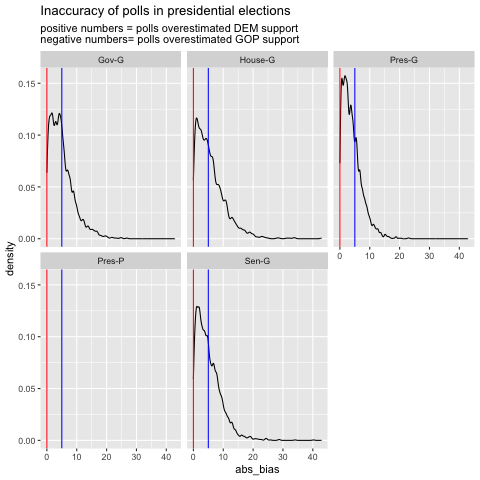

In [13]:
%%R -i df

# a basic histogram
ggplot(df) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [14]:
nyt.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.101667
House-G    3.667273
Pres-G     5.933529
Pres-P          NaN
Sen-G      4.322667
Name: abs_bias, dtype: float64

In [15]:
nyt.groupby('type_simple').abs_bias.std()

type_simple
Gov-G      2.626446
House-G    3.282924
Pres-G     3.373255
Pres-P          NaN
Sen-G      2.165520
Name: abs_bias, dtype: float64

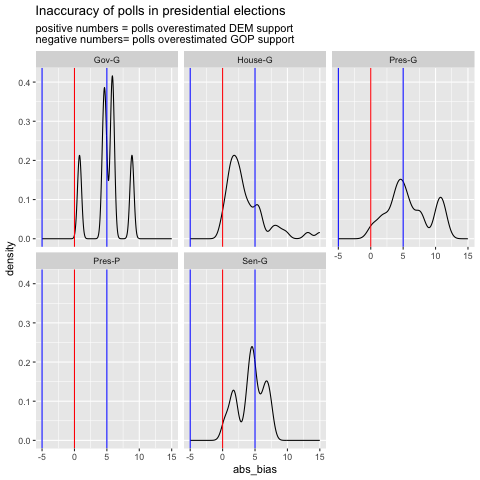

In [16]:
%%R -i nyt

# a basic histogram
ggplot(nyt) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

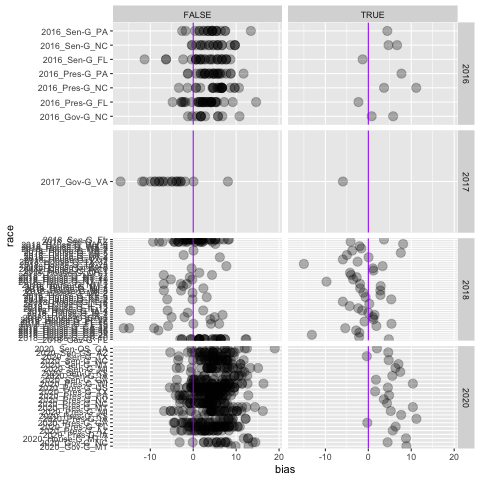

In [50]:
%%R -i nyt -i df

    only_races_this_pollster_has_polled <- nyt$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)


    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=race) +
        geom_point(size=4, alpha=.3) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster=='Siena College/The New York Times Upshot', scales='free_y')

In [17]:
print("Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.")

Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.


👉 **Jayhawk Consulting**

In [18]:
df[df.pollster == "Jayhawk Consulting Services"]

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment,abs_bias
7325,36081,49015,5495,2014,2014_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/26/14,400.0,James E. Sherow,5342,DEM,45.0,Tim Huelskamp,5335,REP,38.0,NaN,7.0,11/4/14,32.03,67.97,-35.94,42.94,0.0,for James E. Sherow,42.94
9146,56550,90986,330,2018,2018_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/23/18,600.0,Alan LaPolice,11713,DEM,38.0,Roger Marshall,11714,REP,42.0,NaN,-4.0,11/6/18,31.85,68.15,-36.29,32.29,1.0,for Alan LaPolice,32.29


In [19]:
print("They just tell their clients that they're way ahead lol.")

They just tell their clients that they're way ahead lol.


👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [20]:
fox = df[df.pollster == "Fox News/Beacon Research/Shaw & Co. Research"]

In [21]:
len(fox)

46

In [22]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [23]:
fox.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      6.965000
House-G    3.055000
Pres-G     3.669167
Pres-P          NaN
Sen-G      5.472222
Name: abs_bias, dtype: float64

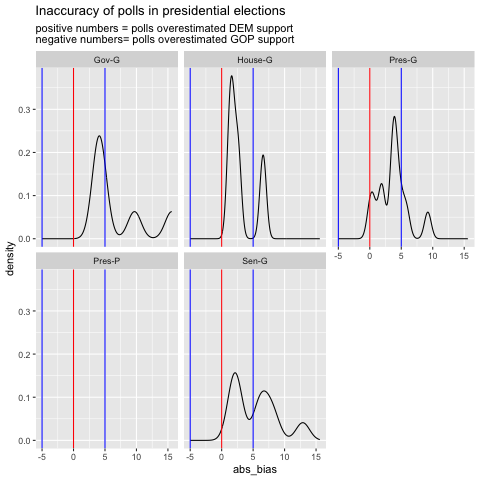

In [24]:
%%R -i fox

# a basic histogram
ggplot(fox) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

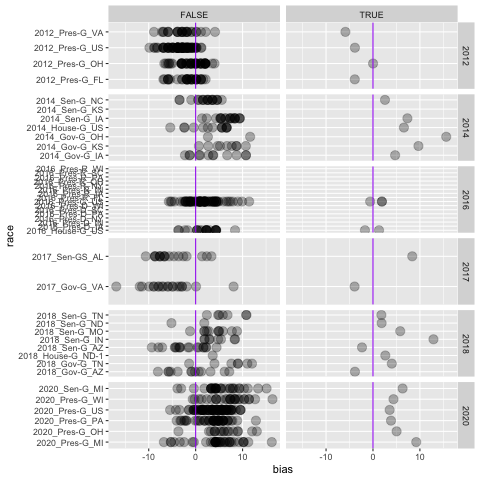

In [49]:
%%R -i fox -i df

    only_races_this_pollster_has_polled <- fox$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)


    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=race) +
        geom_point(size=4, alpha=.3) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster=='Fox News/Beacon Research/Shaw & Co. Research', scales='free_y')

👉 **Brown University**

In [25]:
brown = df[df.pollster == "Brown University"]

In [26]:
len(brown)

12

In [27]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [28]:
brown.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G       9.006667
House-G     5.570000
Pres-G     11.080000
Pres-P           NaN
Sen-G       9.060000
Name: abs_bias, dtype: float64

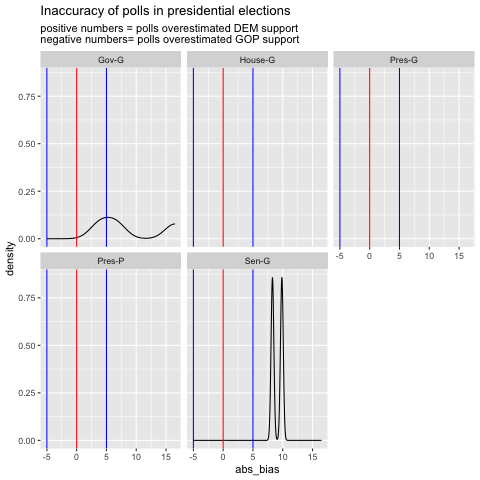

In [43]:
%%R -i brown

# a basic histogram
ggplot(brown) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

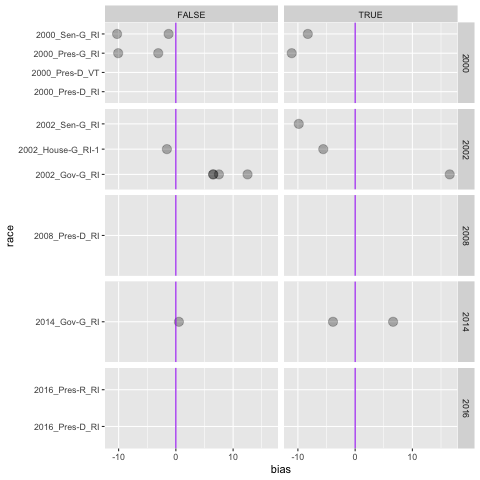

In [46]:
%%R -i brown -i df

    only_races_this_pollster_has_polled <- brown$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)


    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=race) +
        geom_point(size=4, alpha=.3) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster=='Brown University', scales='free_y')

👉 **American Research Group**

In [30]:
arg = df[df.pollster == "American Research Group"]

In [31]:
len(arg)

277

In [32]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [33]:
df.groupby('type_simple').abs_bias.std()

type_simple
Gov-G      4.033684
House-G    4.865010
Pres-G     3.198851
Pres-P          NaN
Sen-G      4.156169
Name: abs_bias, dtype: float64

In [34]:
arg.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      6.483000
House-G    5.798000
Pres-G     3.820000
Pres-P          NaN
Sen-G      3.000833
Name: abs_bias, dtype: float64

In [35]:
arg.groupby('type_simple').abs_bias.std()

type_simple
Gov-G      7.451746
House-G    3.403351
Pres-G     3.076017
Pres-P          NaN
Sen-G      1.926969
Name: abs_bias, dtype: float64

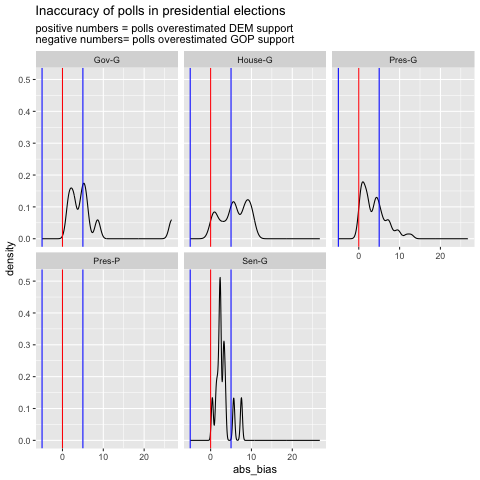

In [36]:
%%R -i arg

# a basic histogram
ggplot(arg) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

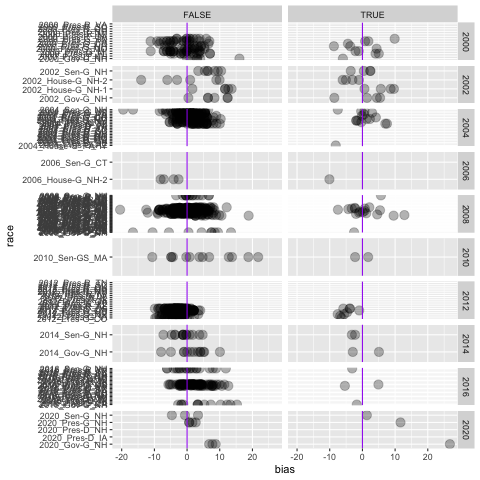

In [48]:
%%R -i arg -i df

    only_races_this_pollster_has_polled <- arg$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)


    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=race) +
        geom_point(size=4, alpha=.3) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster=='American Research Group', scales='free_y')

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

I still don't think I can answer these confidently. I can use ggplot to get a sense of the accuracy of individual pollsters compared to the average, but I don't know how to weight properly factors like location, year, and number of polls conducted when determining overall accuracy. It feels like I would be guessing at a formula that's already been made by people with a lot more background knowledge than me.

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


Of course, more accurate pollsters have less bias than the average pollster for each race they poll. Again, I'm unsure how to generalize this. Doing the general calculations and adding up the differences in a pollster and the average pollster's (absolute value) bias, for example, would be insufficient. Someone with more background would be able to say "eh, a 12% lower bias in this specific race in this specific location in this specific year actually isn't a huge deal for some range of factors, but a 3% lower bias in another race/location/year is a big accomplishment." I can't say that and would inevitably be representing individual races too much or too little.

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
